In [ ]:
# Loading the IMDB dataset
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# Decoding reviews back to text for reference
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Import necessary packages for the model
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Implementing Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Model with One Hidden Layer
model_one_layer = keras.Sequential([
    layers.Dense(32, activation="tanh"),  # One hidden layer with 32 units and 'tanh' activation
    layers.Dropout(0.6),  # Dropout to prevent overfitting
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

In [ ]:
# Compiling the model using 'mse' loss function
model_one_layer.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
# Training the model with one hidden layer
history_one_layer = model_one_layer.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_val, y_val),
                                        callbacks=[early_stopping])  # Early stopping callback

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7087 - loss: 0.1950 - val_accuracy: 0.8438 - val_loss: 0.1274
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8765 - loss: 0.1107 - val_accuracy: 0.8787 - val_loss: 0.0991
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9027 - loss: 0.0876 - val_accuracy: 0.8834 - val_loss: 0.0901
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9144 - loss: 0.0744 - val_accuracy: 0.8876 - val_loss: 0.0863
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9273 - loss: 0.0633 - val_accuracy: 0.8878 - val_loss: 0.0838
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9382 - loss: 0.0577 - val_accuracy: 0.8614 - val_loss: 0.0990
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9416 - loss: 0.0518 - val_accuracy: 0.8869 - val_loss: 0.0826
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9479 - loss: 0.0481 - val_accuracy: 0.8857 - v

In [ ]:
# Model with Three Hidden Layers
model_three_layers = keras.Sequential([
    layers.Dense(32, activation="tanh"),  # First hidden layer with 32 units
    layers.Dropout(0.6),  # Dropout layer
    layers.Dense(32, activation="tanh"),  # Second hidden layer with 32 units
    layers.Dropout(0.6),  # Dropout layer
    layers.Dense(32, activation="tanh"),  # Third hidden layer with 32 units
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

In [ ]:
# Compiling the model using 'mse' loss function
model_three_layers.compile(optimizer="rmsprop",
                           loss="mse",
                           metrics=["accuracy"])

In [ ]:
# Training the model with three hidden layers
history_three_layers = model_three_layers.fit(partial_x_train,
                                              partial_y_train,
                                              epochs=20,
                                              batch_size=512,
                                              validation_data=(x_val, y_val),
                                              callbacks=[early_stopping])  # Early stopping callback

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6450 - loss: 0.2161 - val_accuracy: 0.8507 - val_loss: 0.1116
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8515 - loss: 0.1132 - val_accuracy: 0.8691 - val_loss: 0.0966
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8926 - loss: 0.0825 - val_accuracy: 0.8480 - val_loss: 0.1150


In [ ]:
# Evaluating Both Models
print("One hidden layer model:")
results_one_layer = model_one_layer.evaluate(x_test, y_test)
print(f"Test Loss: {results_one_layer[0]}, Test Accuracy: {results_one_layer[1]}")

print("\nThree hidden layers model:")
results_three_layers = model_three_layers.evaluate(x_test, y_test)
print(f"Test Loss: {results_three_layers[0]}, Test Accuracy: {results_three_layers[1]}")

One hidden layer model:
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8744 - loss: 0.0915
Test Loss: 0.09043655544519424, Test Accuracy: 0.8766000270843506

Three hidden layers model:
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8397 - loss: 0.1205
Test Loss: 0.12147749960422516, Test Accuracy: 0.8398799896240234


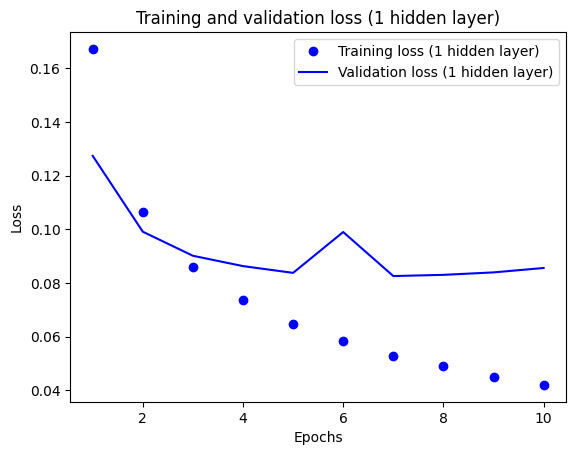

In [ ]:
# Plotting Training and Validation Loss for Both Models
import matplotlib.pyplot as plt

# One hidden layer model results
history_dict_one = history_one_layer.history
loss_values_one = history_dict_one["loss"]
val_loss_values_one = history_dict_one["val_loss"]

epochs = range(1, len(loss_values_one) + 1)

plt.plot(epochs, loss_values_one, "bo", label="Training loss (1 hidden layer)")
plt.plot(epochs, val_loss_values_one, "b", label="Validation loss (1 hidden layer)")
plt.title("Training and validation loss (1 hidden layer)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

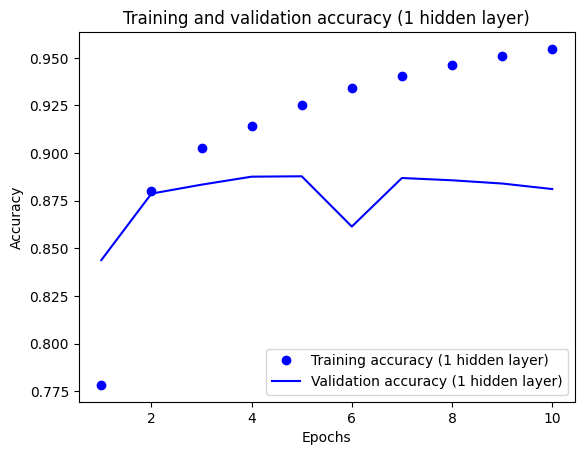

In [ ]:
# Plotting Training and Validation Accuracy for Both Models ###
# One hidden layer model
plt.clf()
acc_one = history_dict_one["accuracy"]
val_acc_one = history_dict_one["val_accuracy"]

plt.plot(epochs, acc_one, "bo", label="Training accuracy (1 hidden layer)")
plt.plot(epochs, val_acc_one, "b", label="Validation accuracy (1 hidden layer)")
plt.title("Training and validation accuracy (1 hidden layer)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

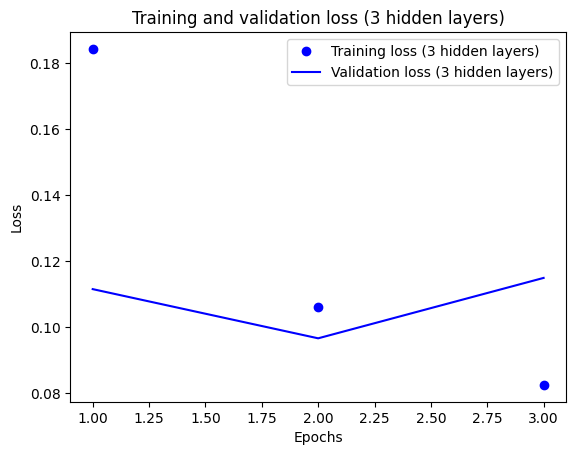

In [ ]:
# Three hidden layers model results
history_dict_three = history_three_layers.history
loss_values_three = history_dict_three["loss"]
val_loss_values_three = history_dict_three["val_loss"]

# Use the length of loss_values_three to determine the number of epochs
epochs_three = range(1, len(loss_values_three) + 1)

plt.plot(epochs_three, loss_values_three, "bo", label="Training loss (3 hidden layers)") # Changed epochs to epochs_three
plt.plot(epochs_three, val_loss_values_three, "b", label="Validation loss (3 hidden layers)") # Changed epochs to epochs_three
plt.title("Training and validation loss (3 hidden layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

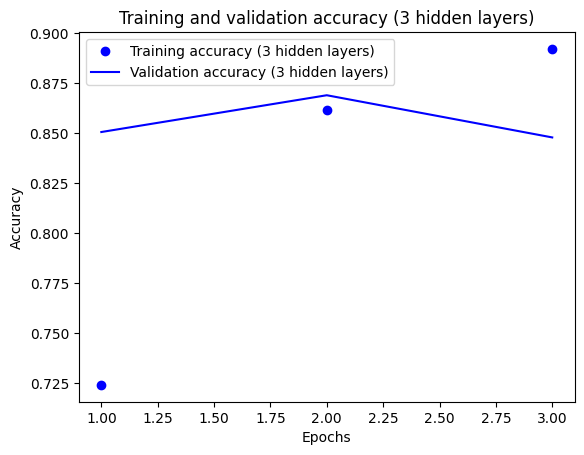

In [ ]:
# Three hidden layers model
plt.clf()
acc_three = history_dict_three["accuracy"]
val_acc_three = history_dict_three["val_accuracy"]

# Use the appropriate epochs for the three-layer model
plt.plot(epochs_three, acc_three, "bo", label="Training accuracy (3 hidden layers)") # Changed epochs to epochs_three
plt.plot(epochs_three, val_acc_three, "b", label="Validation accuracy (3 hidden layers)") # Changed epochs to epochs_three
plt.title("Training and validation accuracy (3 hidden layers)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the modified model
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8413 - loss: 0.1412
Test Loss: 0.1402214616537094, Test Accuracy: 0.841480016708374
